Mean Error: -53.66264119866508
MSE: 179615.51900272438
MAE: 305.1020829275908
RMSE: 423.8107112883349
R^2: 0.5398414278191823
WMAPE: 0.13029965103751576


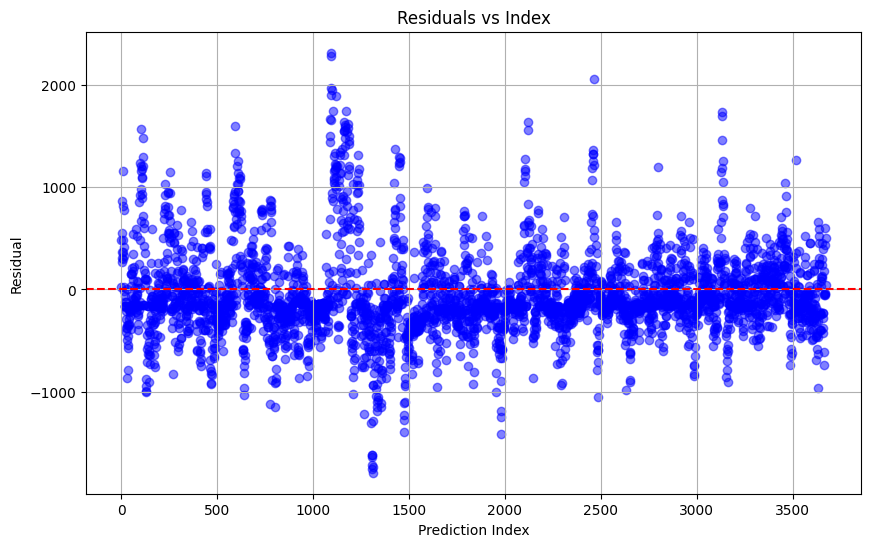

In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

exogenous_data_df = pd.read_excel('ExogenousVariables.xlsx')
exogenous_data_df['Date'] = pd.to_datetime(exogenous_data_df['Date'], format='%d.%m.%y %H:%M:%S')
exogenous_data_df.sort_values(by='Date', inplace=True)
exogenous_data_df['Lag24'] = exogenous_data_df['Ptf Prices'].shift(24)
exogenous_data_df['Lag168'] = exogenous_data_df['Ptf Prices'].shift(168)
exogenous_data_df = exogenous_data_df.dropna()

X = exogenous_data_df[['Lag24', 'Lag168']]
y = exogenous_data_df['Ptf Prices']

def simulate_prices(start_date, end_date):
    start_index = exogenous_data_df[exogenous_data_df['Date'] >= start_date].index[0]
    end_index = exogenous_data_df[exogenous_data_df['Date'] <= end_date].index[-1]
    
    predictions = []
    actual_values = []
    
    model = LinearRegression()
    
    for i in range(start_index, end_index + 1):
        train_indices = X.index[X.index < i]
        test_indices = [i]

        X_train = X.loc[train_indices]
        y_train = y.loc[train_indices]
        X_test = X.loc[test_indices]

        model.fit(X_train, y_train)
        y_pred_i = model.predict(X_test)[0]
        
        predictions.append(y_pred_i)
        actual_values.append(y.loc[i])
    
    predictions = np.array(predictions)
    actual_values = np.array(actual_values)
    
    mean_error = np.mean(predictions - actual_values)
    mse = mean_squared_error(actual_values, predictions)
    mae = mean_absolute_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(actual_values, predictions)
    wmape_value = np.sum(np.abs(actual_values - predictions)) / np.sum(actual_values)
    
    print("Mean Error:", mean_error)
    print("MSE:", mse)
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R^2:", r2)
    print("WMAPE:", wmape_value)
    
    residuals = predictions - actual_values
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Residuals vs Index')
    plt.xlabel('Prediction Index')
    plt.ylabel('Residual')
    plt.grid(True)
    plt.show()
    
    return {
        'predictions': predictions,
        'actual_values': actual_values,
        'metrics': {
            'mean_error': mean_error,
            'mse': mse,
            'mae': mae,
            'rmse': rmse,
            'r2': r2,
            'wmape': wmape_value
        }
    }

start_date = pd.to_datetime('01.05.2024 00:00:00', dayfirst=True)
end_date = pd.to_datetime('01.10.2024 00:00:00', dayfirst=True)
results = simulate_prices(start_date, end_date)